# Data Mining and Analysis Lab Work: Implementation of Polynomial Linear Regression using Python (LAB 5)
## Dated: May 17, 2021
### Submitted To: Dr. Varun Gupta
### Submitted By: Anshul Gupta (CO18311)
#### Software Used: IBM Watson Studio

### Step 1: Data Preprocessing

#### Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the Dataset

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_0a540e30cc1440b39b57345b3721ab45 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_0a540e30cc1440b39b57345b3721ab45 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_0a540e30cc1440b39b57345b3721ab45 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Y-0cVIXL068746-WzuC3_ASyZ5pfIwZNcG7UpjNtaYnx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_0a540e30cc1440b39b57345b3721ab45)

body = client_0a540e30cc1440b39b57345b3721ab45.get_object(Bucket='dataminingandanalysislab-donotdelete-pr-fpuetwfuzbmdpt',Key='Position_Salaries.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = dataset.iloc[:, 1 : 2 ].values
y = dataset.iloc[:, 2 ].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

### Step 2: Training of the model

#### Fitting Simple Linear Regression to the dataset

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

####  Fitting Polynomial Regression to the dataset

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2 .fit(X_poly, y )

LinearRegression()

### Step 3: Visualising the Results

#### Visualising the Simple Linear Regression Results

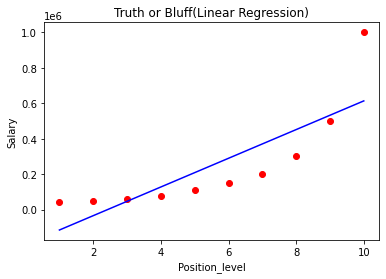

In [8]:
plt.scatter( X, y, color = 'red' )
plt.plot( X, lin_reg.predict(X), color = 'blue')
plt.title( 'Truth or Bluff(Linear Regression)')
plt.xlabel('Position_level')
plt.ylabel('Salary')
plt.show()

#### Visualising the Polynomial Linear Regression Results

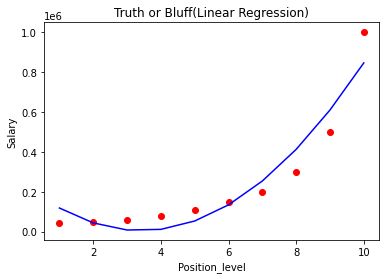

In [9]:
plt.scatter( X, y, color = 'red' )
plt.plot( X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title( 'Truth or Bluff(Linear Regression)')
plt.xlabel('Position_level')
plt.ylabel('Salary')
plt.show()

### Step 4: Predicting New results

#### Predicting a new result with Linear Regression

In [10]:
array=np.array([6.5])
valtopredict=array.reshape(-1, 1)
lin_reg.predict(valtopredict)[0]

330378.7878787879

#### Predicting a new result with Polynomial Regression

In [11]:
lin_reg_2.predict(poly_reg.fit_transform(valtopredict))[0]

189498.10606060608

## Performing the above steps on Sklearn's Boston House Prediction Dataset

### Step 1: Data Preprocessing

#### Importing the Dataset

In [12]:
from sklearn.datasets import load_boston
datasetBoston = load_boston()

In [13]:
datasetBoston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [14]:
dataset = pd.DataFrame(datasetBoston.data, columns=datasetBoston.feature_names)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
dataset['TargetVal'] = datasetBoston.target

In [16]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TargetVal
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### CASE 2:  
#### Input parameter is RM =  average number of rooms per dwelling
#### Output Parameter is TargetVal = Median value of owner-occupied homes in dollar 1000's

In [17]:
X = dataset.iloc[:, 5 : 6 ].values
y = dataset.iloc[:, 13].values

In [18]:
X, X.size

(array([[6.575],
        [6.421],
        [7.185],
        [6.998],
        [7.147],
        [6.43 ],
        [6.012],
        [6.172],
        [5.631],
        [6.004],
        [6.377],
        [6.009],
        [5.889],
        [5.949],
        [6.096],
        [5.834],
        [5.935],
        [5.99 ],
        [5.456],
        [5.727],
        [5.57 ],
        [5.965],
        [6.142],
        [5.813],
        [5.924],
        [5.599],
        [5.813],
        [6.047],
        [6.495],
        [6.674],
        [5.713],
        [6.072],
        [5.95 ],
        [5.701],
        [6.096],
        [5.933],
        [5.841],
        [5.85 ],
        [5.966],
        [6.595],
        [7.024],
        [6.77 ],
        [6.169],
        [6.211],
        [6.069],
        [5.682],
        [5.786],
        [6.03 ],
        [5.399],
        [5.602],
        [5.963],
        [6.115],
        [6.511],
        [5.998],
        [5.888],
        [7.249],
        [6.383],
        [6.816],
        [6.145

In [19]:
y, y.size

(array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
        23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
        15.6, 11.8, 13.8, 15.6, 14.6, 

### Step 2: Training of the model for input parameter RM and output TargetVal

#### Fitting Simple Linear Regression to the dataset

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

#### Fitting Simple Polynomial Regression to the dataset

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2 .fit(X_poly, y )

LinearRegression()

### Step 3: Visualising the Results for input parameter RM and Output TargetVal

#### Visualising the Linear Regression Results

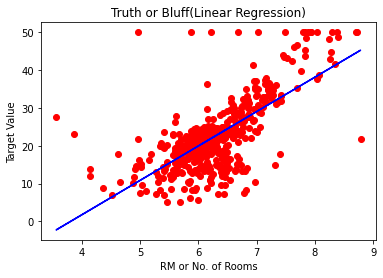

In [22]:
plt.scatter( X, y, color = 'red' )
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title( 'Truth or Bluff(Linear Regression)')
plt.xlabel('RM or No. of Rooms')
plt.ylabel('Target Value')
plt.show()

#### Visualising the Polynomial Linear Regression Results

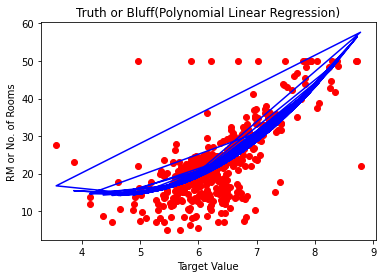

In [23]:
plt.scatter( X, y, color = 'red' )
plt.plot( X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title( 'Truth or Bluff(Polynomial Linear Regression)')
plt.xlabel('Target Value')
plt.ylabel('RM or No. of Rooms')
plt.show()

### Step 4: Predicting New results  for RM using the new models

#### Predicting a new result with Linear Regression

In [24]:
array=np.array([5])
valtopredict=array.reshape(-1, 1)
lin_reg.predict(valtopredict)[0]

10.839924129462979

#### Predicting a new result with Polynomial Linear Regression

In [25]:
array=np.array([5])
valtopredict=array.reshape(-1, 1)
lin_reg_2.predict(poly_reg.fit_transform(valtopredict))[0]

14.595631714407531

### CASE 2:  
#### Input parameter is LSTAT = Lower status of the population
#### Output Parameter is TargetVal = Median value of owner-occupied homes in dollar 1000's

In [26]:
X = dataset.iloc[:, 12 : 13 ].values
y = dataset.iloc[:, 13].values

In [27]:
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [28]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Step 2: Training of the model for input parameter LSTAT and output TargetVal

#### Fitting Simple Linear Regression to the dataset

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

#### Fitting Polynomial Linear Regression to the dataset

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2 .fit(X_poly, y )

LinearRegression()

### Step 3: Visualising the Results for input parameter LSTAT and Output TargetVal

#### Visualising the Linear Regression Results

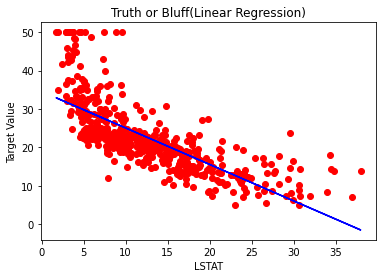

In [31]:
plt.scatter( X, y, color = 'red' )
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title( 'Truth or Bluff(Linear Regression)')
plt.xlabel('LSTAT')
plt.ylabel('Target Value')
plt.show()

#### Visualising the Polynomial Linear Regression Results

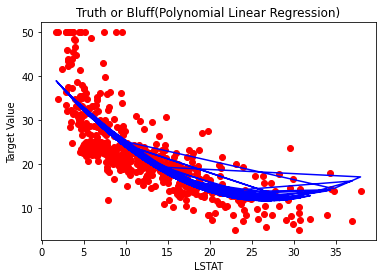

In [32]:
plt.scatter( X, y, color = 'red' )
plt.plot( X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title( 'Truth or Bluff(Polynomial Linear Regression)')
plt.xlabel('LSTAT')
plt.ylabel('Target Value')
plt.show()

### Step 4: Predicting New results  for LSTAT using the new models

#### Predicting a new result with Linear Regression

In [33]:
array=np.array([7.5])
valtopredict=array.reshape(-1, 1)
lin_reg.predict(valtopredict)[0]

27.428470726198178

#### Predicting a new result with Polynomial Linear Regression

In [34]:
array=np.array([7.5])
valtopredict=array.reshape(-1, 1)
lin_reg_2.predict(poly_reg.fit_transform(valtopredict))[0]

27.815361617448893